<a href="https://colab.research.google.com/github/hannanote/Mobile_Health_Human_Behavior_Analysis_Project/blob/main/MOBILE_HEALTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mobile Health Human Behavior Analysis Project

#### This project is predict human behavior based on multimodel body sensing.
##### https://archive.ics.uci.edu/dataset/319/mhealth+dataset

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

In [2]:
#Downloading data from UCI Machine Learning repository
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
!unzip MHEALTHDATASET.zip

--2025-02-12 23:34:12--  http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘MHEALTHDATASET.zip’

MHEALTHDATASET.zip      [       <=>          ]  72.07M  11.9MB/s    in 6.1s    

2025-02-12 23:34:19 (11.7 MB/s) - ‘MHEALTHDATASET.zip’ saved [75567983]

Archive:  MHEALTHDATASET.zip
   creating: MHEALTHDATASET/
  inflating: MHEALTHDATASET/mHealth_subject1.log  
  inflating: MHEALTHDATASET/mHealth_subject10.log  
  inflating: MHEALTHDATASET/mHealth_subject2.log  
  inflating: MHEALTHDATASET/mHealth_subject3.log  
  inflating: MHEALTHDATASET/mHealth_subject4.log  
  inflating: MHEALTHDATASET/mHealth_subject5.log  
  inflating: MHEALTHDATASET/mHealth_subject6.log  
  inflating: MHEALTHDATASET/mHealth_subject7.log  
  inflating: 

In [3]:
# checking lists on the file
os.listdir('MHEALTHDATASET/')

['mHealth_subject7.log',
 'mHealth_subject8.log',
 'README.txt',
 'mHealth_subject5.log',
 'mHealth_subject10.log',
 'mHealth_subject1.log',
 'mHealth_subject4.log',
 'mHealth_subject6.log',
 'mHealth_subject2.log',
 'mHealth_subject9.log',
 'mHealth_subject3.log']

In [4]:
# Exclude 'README.txt' file
for file in os.listdir('MHEALTHDATASET/'):
  if  file != ('README.txt'):
    print(file)

mHealth_subject7.log
mHealth_subject8.log
mHealth_subject5.log
mHealth_subject10.log
mHealth_subject1.log
mHealth_subject4.log
mHealth_subject6.log
mHealth_subject2.log
mHealth_subject9.log
mHealth_subject3.log


## Import the Data and Data Exploration
#### 10 volunteers who performed 12 different physical activites.

In [5]:
df = pd.DataFrame()

for i in range(1,11):
  df1 = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
  df1 = df1.loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]]
  df1 = df1.rename(columns={
      5:"alx", 6:"aly", 7:"alz", 8:"glx", 9:"gly", 10:"glz", 14:"arx",15:"ary", 16:"arz", 17:"grx", 18:"gry", 19:"grz", 23:"Activity"
      })
  df = pd.concat([df, df1])
df

# 1215745 rows × 13 columns

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98299,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0
98300,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0
98301,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0
98302,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0


### Column information

##### Column 0: acceleration from the left-ankle sensor (X axis)
##### Column 1: acceleration from the left-ankle sensor (Y axis)
##### Column 2: acceleration from the left-ankle sensor (Z axis)
##### Column 3: gyro from the left-ankle sensor (X axis)
##### Column 4: gyro from the left-ankle sensor (Y axis)
##### Column 5: gyro from the left-ankle sensor (Z axis)

##### Column 6: acceleration from the right-lower-arm sensor (X axis)
##### Column 7: acceleration from the right-lower-arm sensor (Y axis)
##### Column 8: acceleration from the right-lower-arm sensor (Z axis)
##### Column 9: gyro from the right-lower-arm sensor (X axis)
##### Column 10: gyro from the right-lower-arm sensor (Y axis)
##### Column 11: gyro from the right-lower-arm sensor (Z axis)

##### Column 12: Label (0 for the null class)

In [6]:
df['Activity'].value_counts()

,count
Activity,
0,872550
1,30720
2,30720
3,30720
4,30720
9,30720
10,30720
11,30720
5,30720


### 12 physical activites
##### L1: Standing still (1 min)
##### L2: Sitting and relaxing (1 min)
##### L3: Lying down (1 min)
##### L4: Walking (1 min)
##### L5: Climbing stairs (1 min)
##### L6: Waist bends forward (20x)
##### L7: Frontal elevation of arms (20x)
##### L8: Knees bending (crouching) (20x)
##### L9: Cycling (1 min)
##### L10: Jogging (1 min)
##### L11: Running (1 min)
##### L12: Jump front & back (20x)

In [7]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'}

In [8]:
# Remove 0 variable because there is no referenve of activity.
df = df[df['Activity'] > 0]
df['Activity'].value_counts()

,count
Activity,
1,30720
2,30720
3,30720
4,30720
9,30720
10,30720
11,30720
5,30720
7,29441


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343195 entries, 6656 to 96204
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       343195 non-null  float64
 1   aly       343195 non-null  float64
 2   alz       343195 non-null  float64
 3   glx       343195 non-null  float64
 4   gly       343195 non-null  float64
 5   glz       343195 non-null  float64
 6   arx       343195 non-null  float64
 7   ary       343195 non-null  float64
 8   arz       343195 non-null  float64
 9   grx       343195 non-null  float64
 10  gry       343195 non-null  float64
 11  grz       343195 non-null  float64
 12  Activity  343195 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 36.7 MB


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,343195.0,1.805184,4.214175,-22.1460,0.159875,1.372500,2.924450,20.0240
aly,343195.0,-9.061487,5.200389,-19.6190,-10.063000,-9.597700,-7.549800,21.1610
alz,343195.0,-0.701985,6.457622,-19.3730,-3.494350,0.340070,1.819300,25.0150
glx,343195.0,0.101167,0.458913,-1.7792,-0.345080,0.204080,0.487940,1.7106
gly,343195.0,-0.549942,0.434721,-2.6604,-0.810510,-0.688560,-0.487800,1.7523
glz,343195.0,-0.121145,0.555923,-2.6267,-0.567780,-0.098232,0.349710,1.5815
arx,343195.0,-3.448201,5.891595,-22.3450,-5.013900,-2.480000,-0.539050,19.8010
ary,343195.0,-5.781446,6.578371,-18.9720,-9.558100,-7.738900,-2.359550,21.9650
arz,343195.0,2.381165,4.177971,-18.2380,0.139070,1.819100,5.324750,25.7410
grx,343195.0,-0.201574,0.549524,-1.1706,-0.682350,-0.300000,0.278430,1.4157


### Exploratory Data Analysis

<ipython-input-14-4ab8633dd070>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


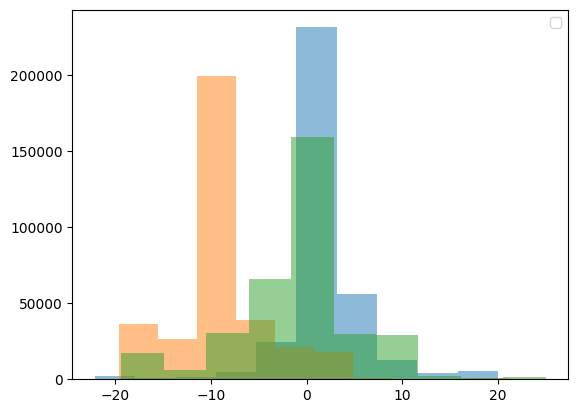

In [ ]:
plt.hist(df['alx'].reset_index(drop=True), alpha=0.5)
plt.hist(df['aly'].reset_index(drop=True), alpha=0.5)
plt.hist(df['alz'].reset_index(drop=True), alpha=0.5)
plt.legend()
plt.show()

<ipython-input-15-6dd28f83ed16>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


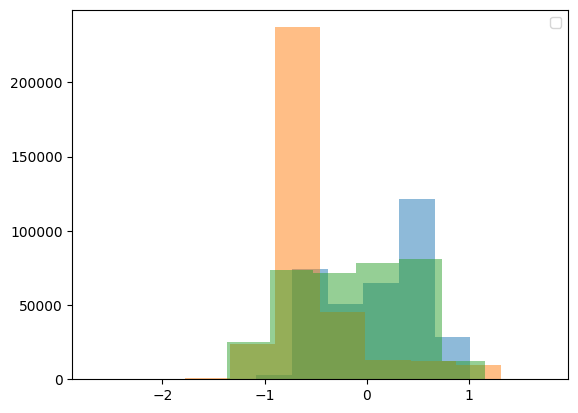

In [ ]:
plt.hist(df['glx'].reset_index(drop=True), alpha=0.5)
plt.hist(df['gly'].reset_index(drop=True), alpha=0.5)
plt.hist(df['glz'].reset_index(drop=True), alpha=0.5)
plt.legend()
plt.show()

<ipython-input-16-2adf36e51365>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


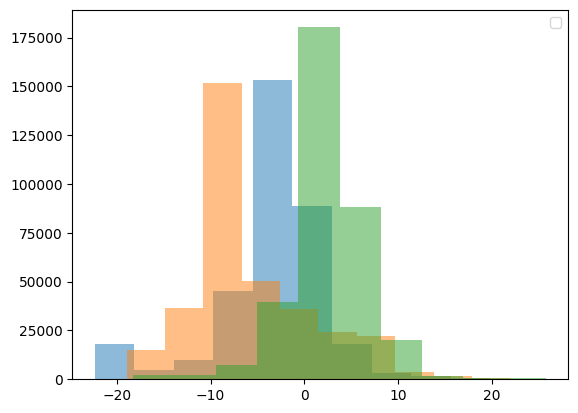

In [ ]:
plt.hist(df['arx'].reset_index(drop=True), alpha=0.5)
plt.hist(df['ary'].reset_index(drop=True), alpha=0.5)
plt.hist(df['arz'].reset_index(drop=True), alpha=0.5)
plt.legend()
plt.show()

<ipython-input-17-d95ce494be48>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


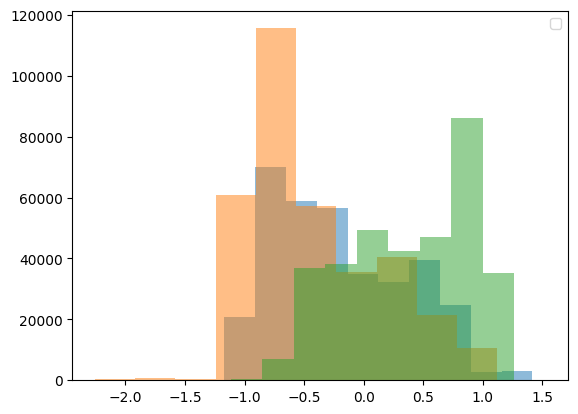

In [ ]:
plt.hist(df['grx'].reset_index(drop=True), alpha=0.5)
plt.hist(df['gry'].reset_index(drop=True), alpha=0.5)
plt.hist(df['grz'].reset_index(drop=True), alpha=0.5)
plt.legend()
plt.show()

In [ ]:
def plot_comparison(data, metric):

  metric = metric[0].lower()
  data = data

  for i in range(0,13):
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], color='red', alpha=.5, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='green', alpha=.5, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='blue', alpha=.5, label=metric+'lz')
    plt.title(f'{label_map[i]} (left-ankle)')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], color='red', alpha=.5, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='green', alpha=.5, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='blue', alpha=.5, label=metric+'rz')
    plt.title(f'{label_map[i]} (right-arm)')
    plt.legend()

    plt.show()
    print()

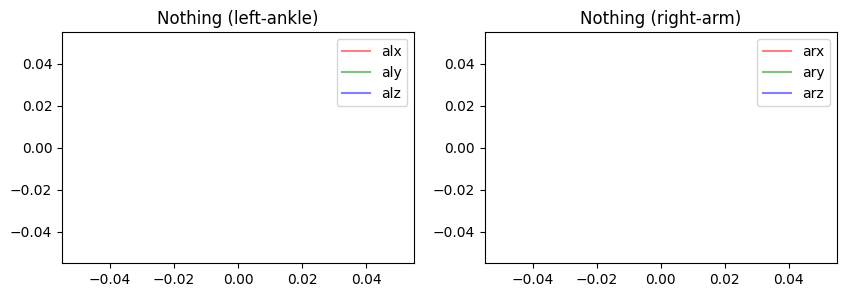

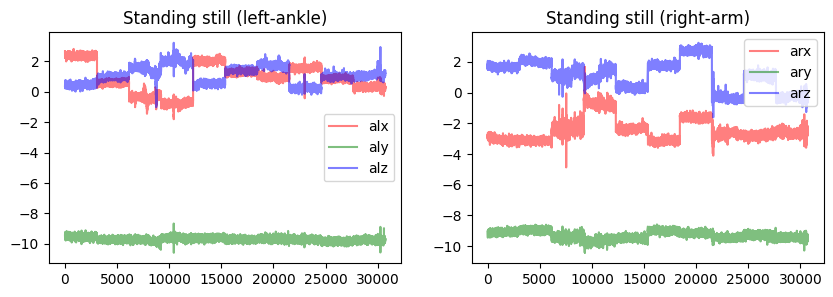

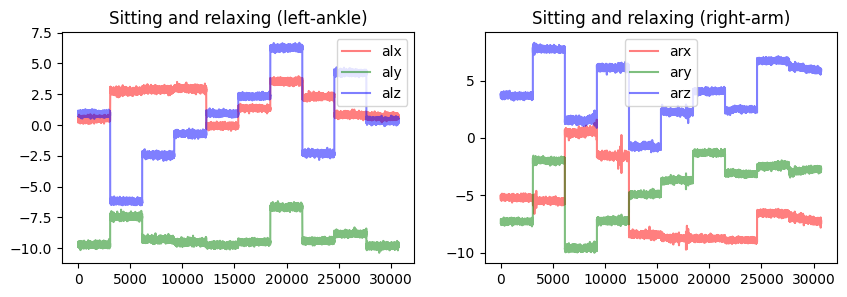

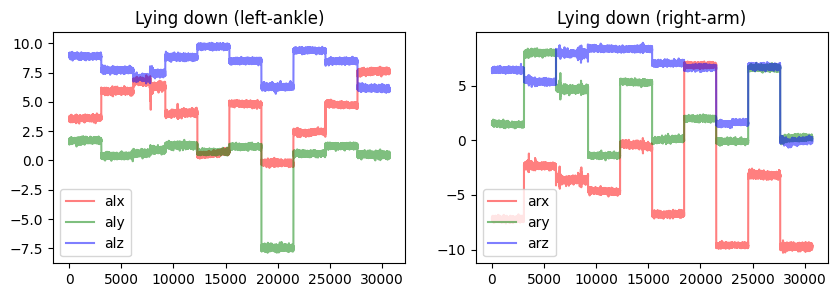

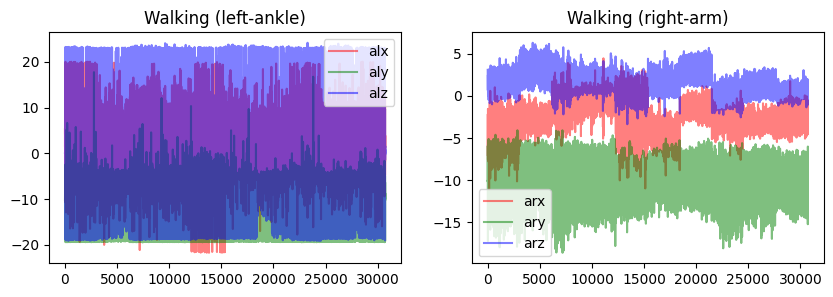

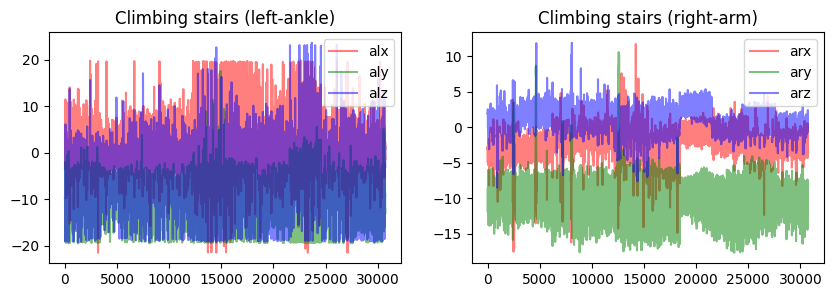

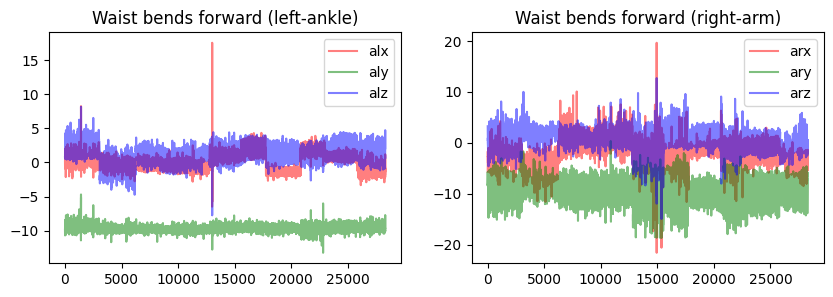

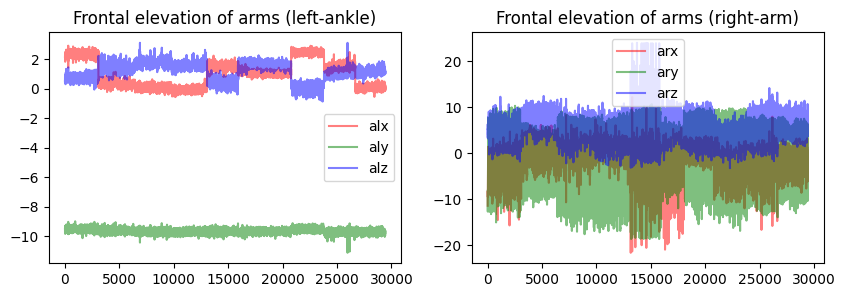

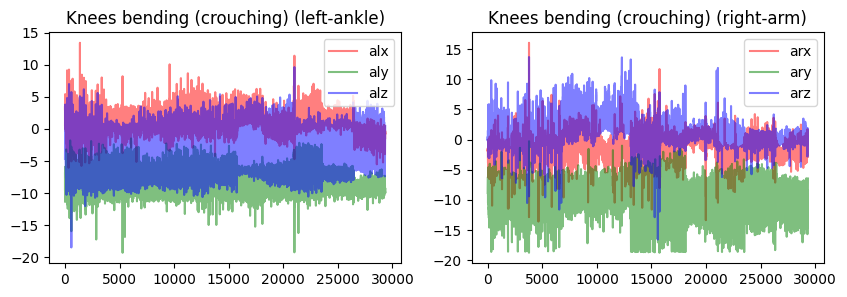

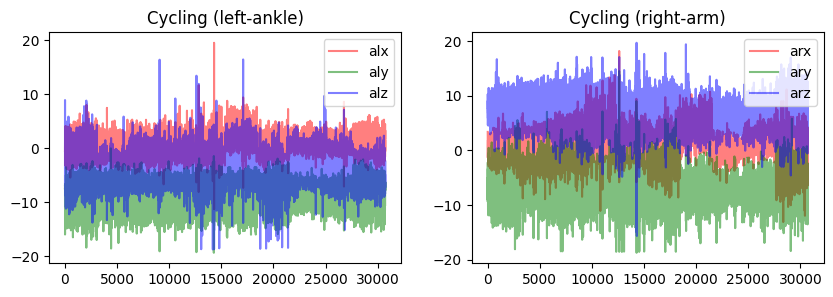

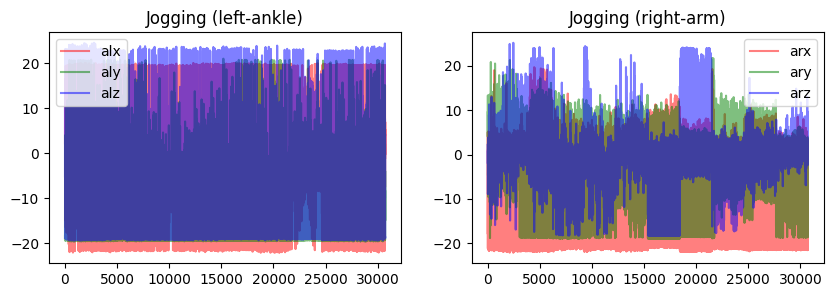

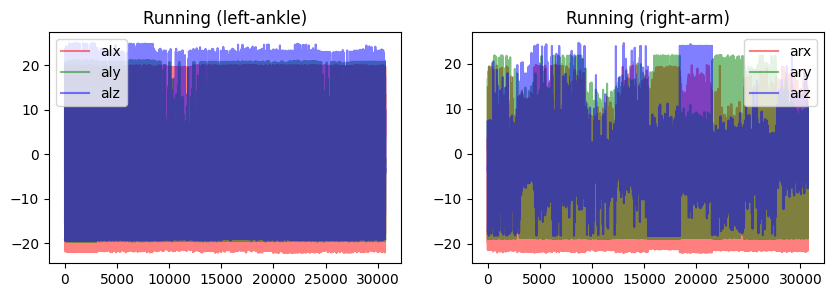

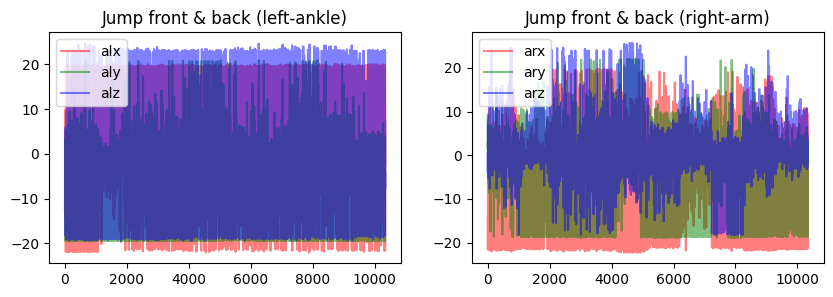

In [ ]:
 plot_comparison(df, 'Acceleration')

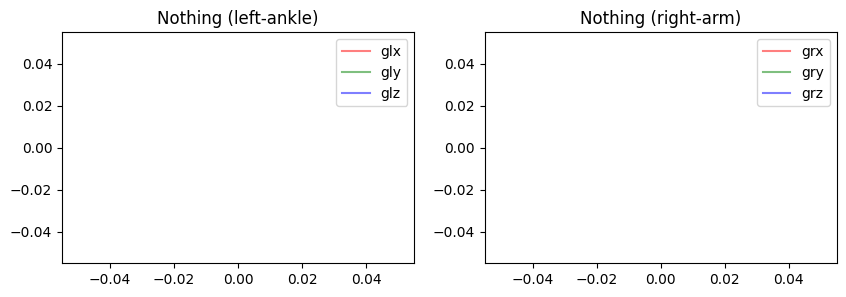

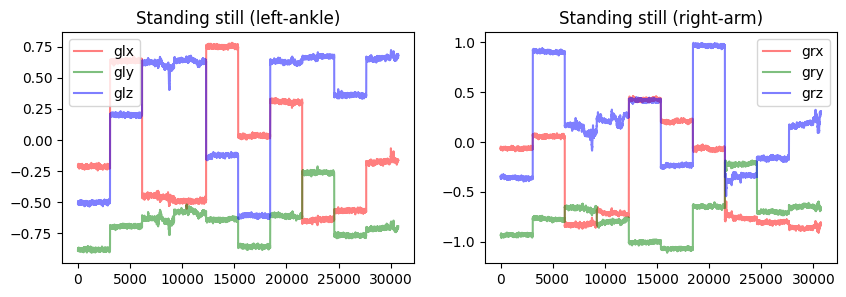

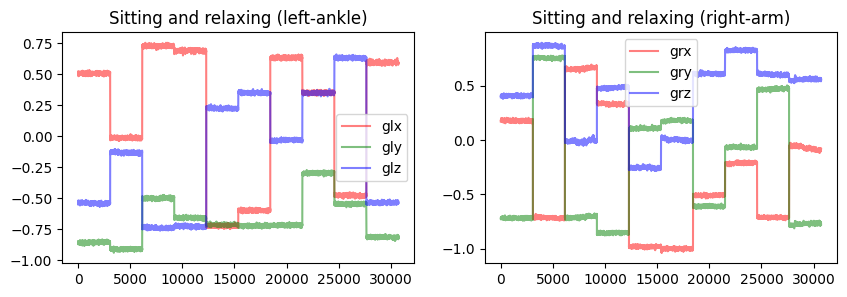

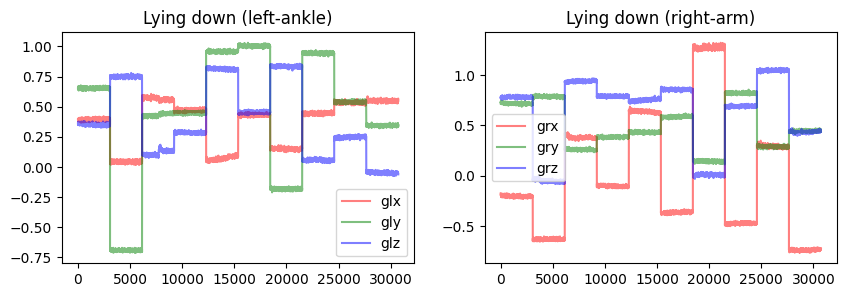

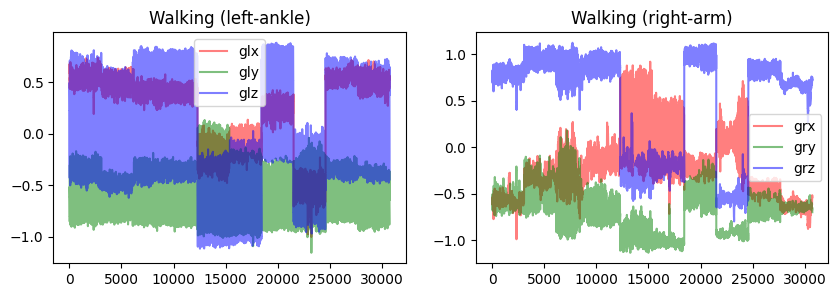

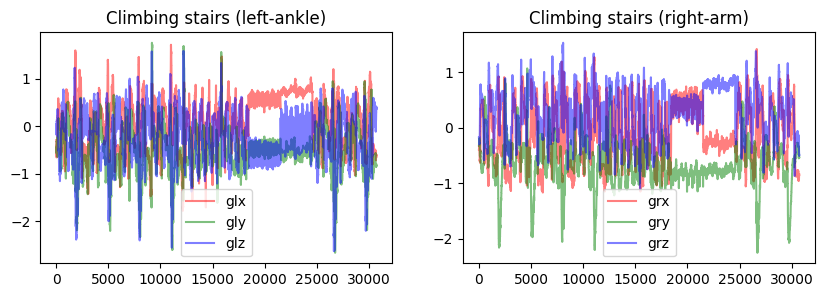

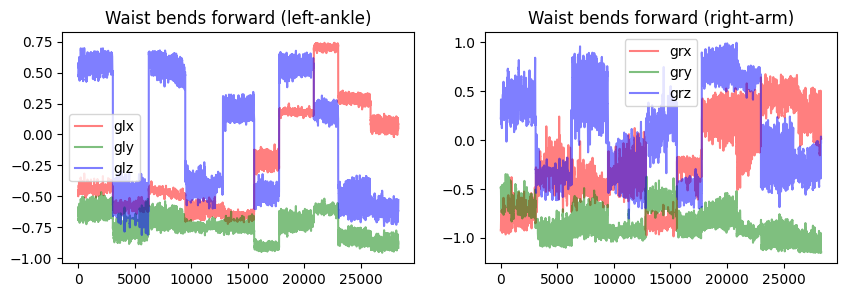

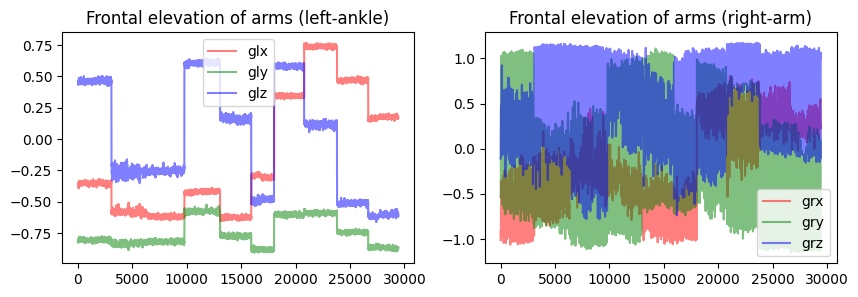

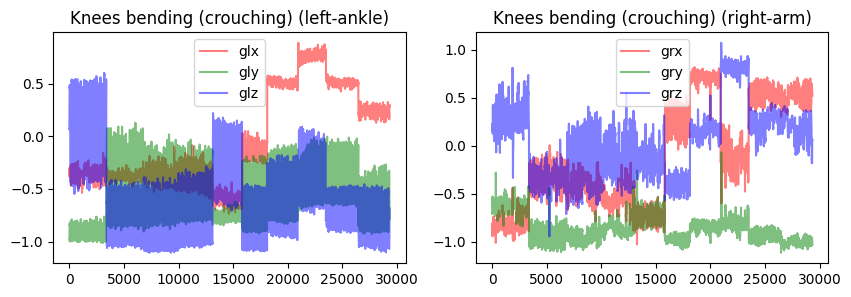

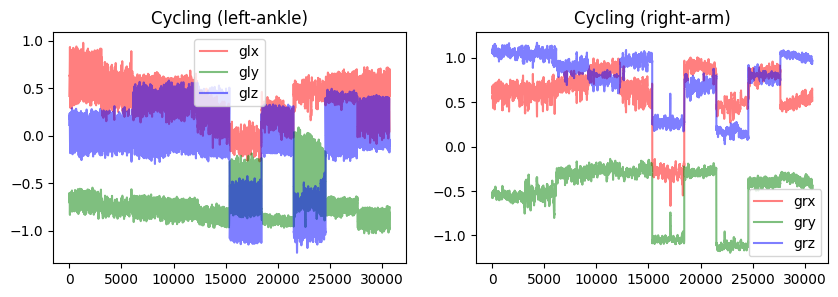

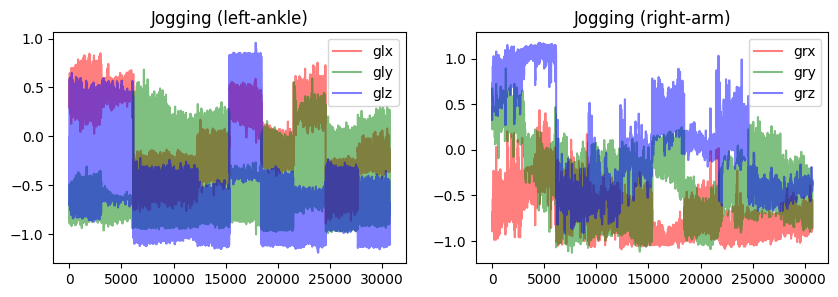

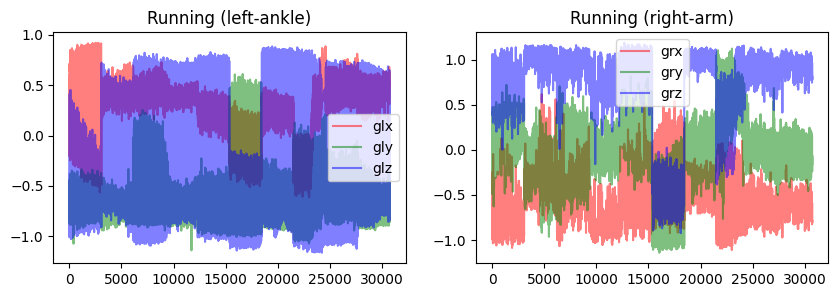

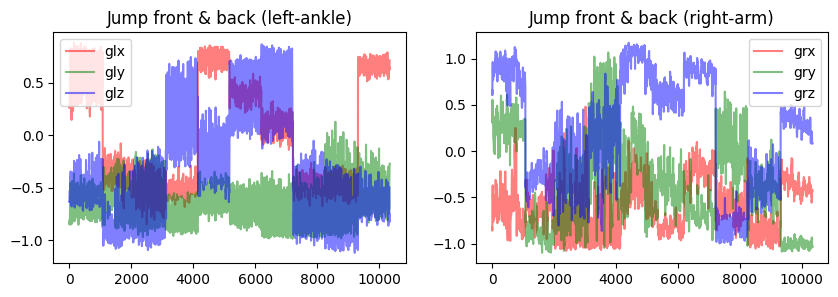

In [ ]:
plot_comparison(df, 'Gyro')

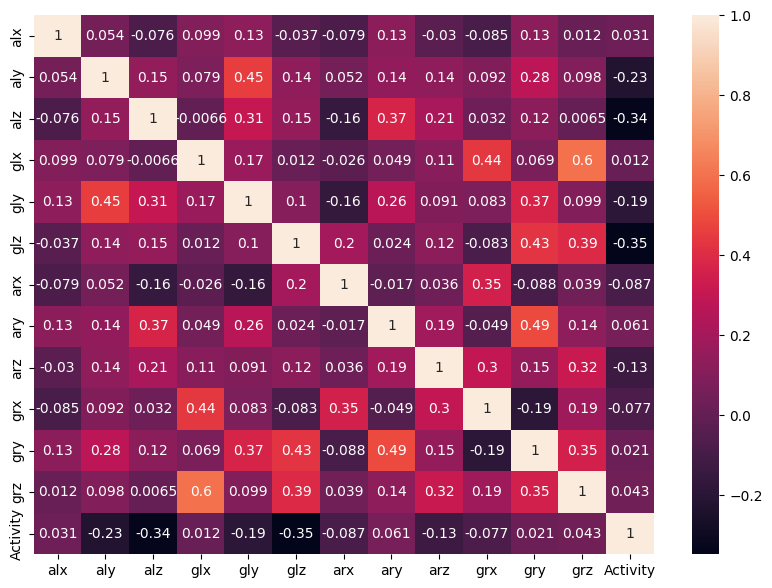

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
plt.show()

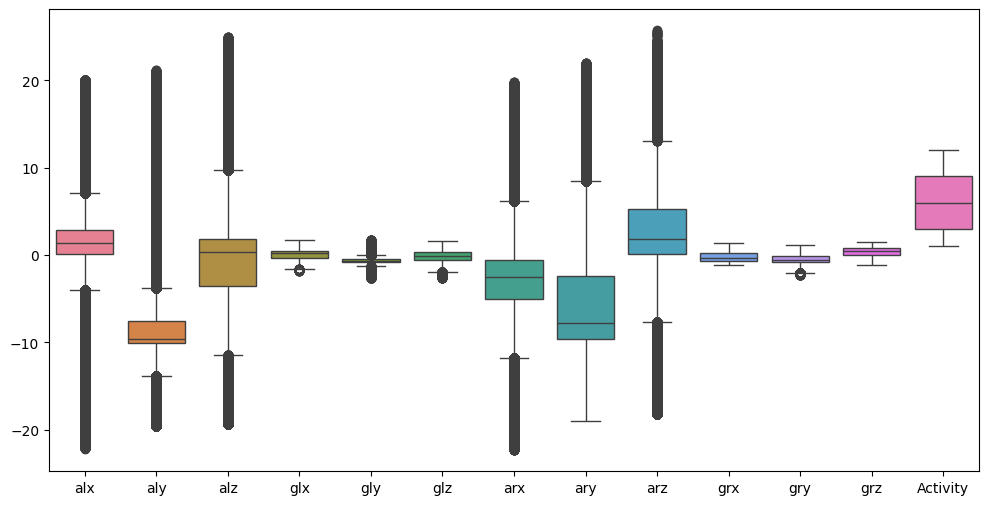

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.show()

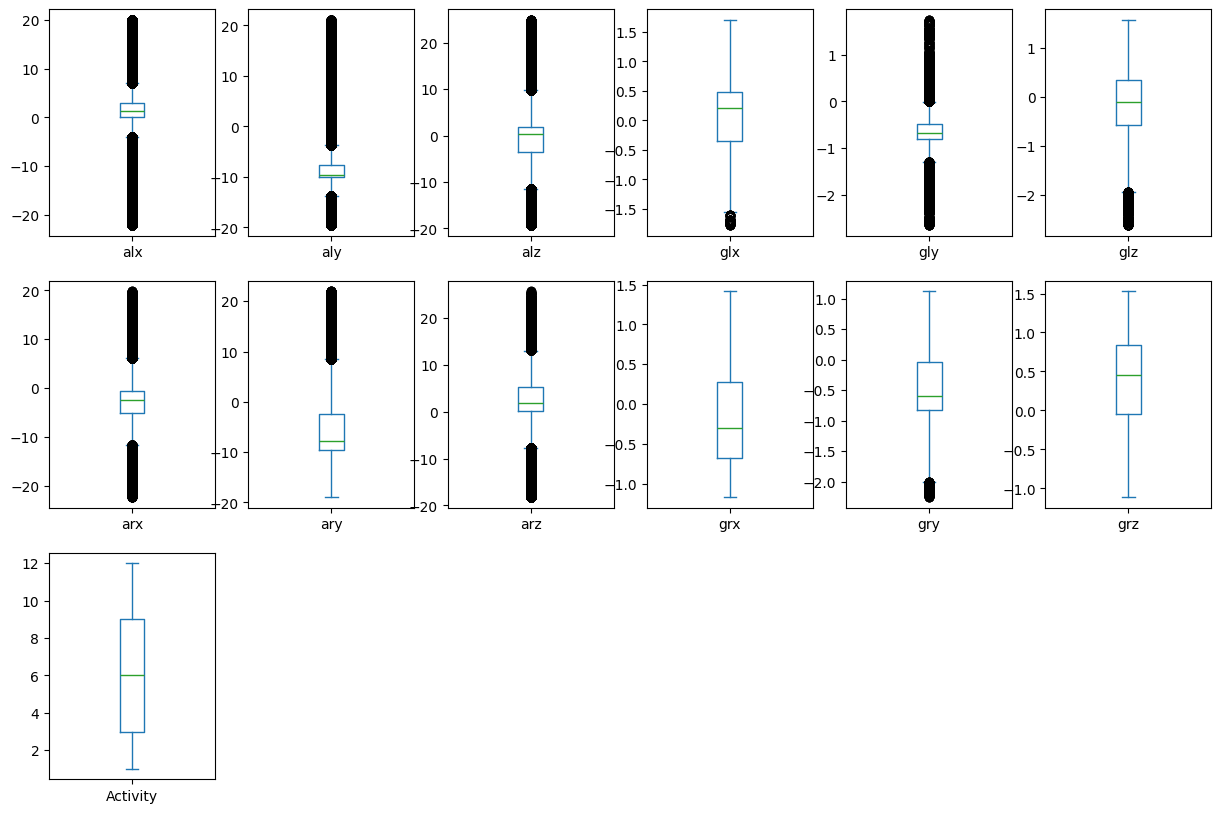

In [ ]:
df.plot(kind='box', subplots = True, layout = (3,6), figsize=(15,10))
plt.show()

(array([61440., 30720., 30720., 30720., 28315., 29441., 29337., 30720.,
        30720., 41062.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

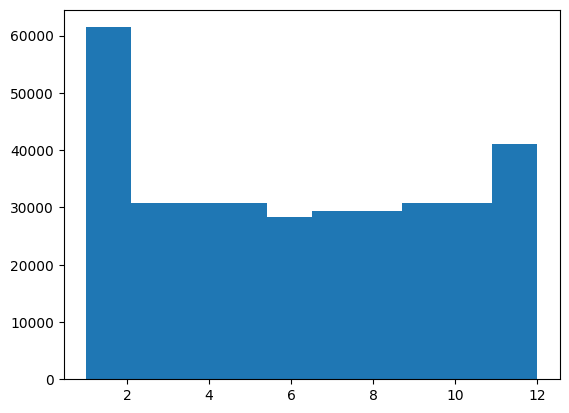

In [ ]:
plt.hist(df['Activity'])

<Axes: xlabel='Activity'>

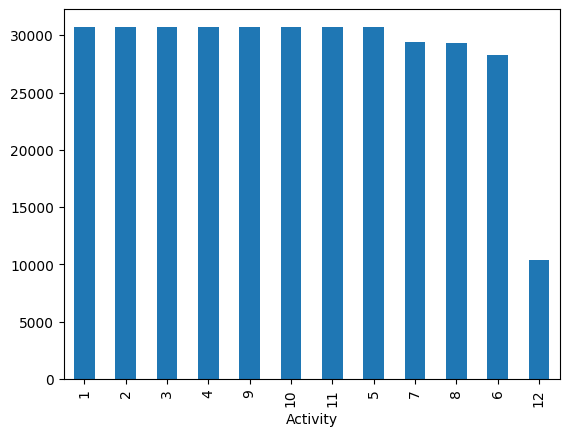

In [ ]:
df['Activity'].value_counts().plot(kind='bar')

## Data Preparation
##### First, I split the data between the dependent variables and independent variable.
##### The independent variables will be stored in X and the target variable will be stored in y.

In [10]:
X = df.drop(['Activity'], axis=1)
X.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
6656,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483
6657,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483
6658,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483
6659,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052
6660,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052


In [11]:
y = df['Activity']
y
# 343195 rows × 1 columns

,Activity
6656,1
6657,1
6658,1
6659,1
6660,1
...,...
96200,12
96201,12
96202,12
96203,12


In [12]:
X.shape, y.shape

((343195, 12), (343195,))

In [13]:
X.dtypes

,0
alx,float64
aly,float64
alz,float64
glx,float64
gly,float64
glz,float64
arx,float64
ary,float64
arz,float64
grx,float64


In [14]:
y.dtypes

dtype('int64')

## Train & Test Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42, stratify=y)
print("Length of training set: " + str(len(X_train)))

Length of training set: 240236


In [16]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_std = std_scaler.fit_transform(X_train)  # Fit and transform on train set
X_test_std = std_scaler.transform(X_test)  # Only transform test set

# Convert back to DataFrame (optional)
X_train = pd.DataFrame(X_train_std, columns=X.columns)
X_test = pd.DataFrame(X_test_std, columns=X.columns)

In [17]:
display(X_train.head())
display(X_test.head())

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,-0.258011,0.045715,0.777179,-1.266659,0.017851,1.354306,-0.520147,0.528766,1.065846,-0.946107,1.626819,0.414435
1,0.541077,-0.015288,-0.156254,0.034189,0.367219,-1.899528,0.157284,-0.661822,-0.304570,1.437862,-0.334129,-1.578727
2,-0.380115,-0.122145,0.272460,-0.612185,-0.387587,1.357835,0.133481,-0.560230,-0.595801,-1.224471,-0.409409,-0.366955
3,-0.123404,-0.203098,0.337045,-0.749542,-0.775783,-0.697043,-0.104225,-0.492512,0.007997,0.327956,-1.184756,-1.419936
4,-2.047190,-0.657983,0.911447,-0.822271,0.289561,-1.595468,0.533607,1.652304,-0.454112,-0.635618,-0.868587,-1.311304


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,-0.124331,-0.140463,0.328275,-0.155679,-0.659320,-0.856202,0.044280,-0.477088,-0.197756,0.763355,-1.203636,-1.211008
1,-0.630946,-0.113273,0.374498,-1.537324,-0.512672,-0.357519,0.700743,-0.167139,-0.253174,-0.539263,-0.951382,-1.077305
2,0.404310,-1.637838,0.687739,1.068422,-0.516994,0.095201,0.119576,-0.733464,0.388023,-0.100294,-0.424458,0.995252
3,0.023633,0.200749,-0.978956,-1.509060,-0.297009,-0.845599,0.088354,-1.413991,0.057670,-0.810492,-0.759433,-1.135800
4,0.989246,1.810472,1.277807,-0.135481,-0.327217,1.573593,0.185501,2.074797,0.683809,-0.792637,2.176326,-0.834949


In [18]:
X_train.shape, X_test.shape

((240236, 12), (102959, 12))

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Modeling

In [20]:
df_model_summary_cat = pd.DataFrame(
   {
      "Model": [],
      "Recall": [],
      "Specificity": [],
      "Precision": [],
      "Balanced Accuracy": [],
      "F1-Score": []
   }
)


def add_score_cat(model, recall, specificity, precision, balanced_accuracy, f1_score):
   df_model_summary_cat.loc[df_model_summary_cat.shape[0]] = [model, recall, specificity, precision, balanced_accuracy,
                                                              f1_score]

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create Logistic Regression model
lr = LogisticRegression(max_iter=10000, multi_class='ovr')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [22]:
print("Training Set:\n")
print(classification_report(y_train, y_pred))

matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Training Set):\n", matrix)

TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_pred, average='macro')
precision = precision_score(y_train, y_pred, average='macro')
f1 = f1_score(y_train, y_pred, average='macro')

print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

Training Set:

              precision    recall  f1-score   support

           1       0.52      0.61      0.56     21504
           2       0.60      0.50      0.55     21504
           3       0.99      1.00      0.99     21504
           4       0.49      0.54      0.51     21504
           5       0.51      0.32      0.39     21504
           6       0.47      0.63      0.54     19820
           7       0.62      0.56      0.59     20609
           8       0.49      0.56      0.52     20536
           9       0.80      0.92      0.85     21504
          10       0.70      0.69      0.69     21504
          11       0.57      0.63      0.60     21504
          12       0.56      0.03      0.05      7239

    accuracy                           0.61    240236
   macro avg       0.61      0.58      0.57    240236
weighted avg       0.61      0.61      0.60    240236

[[13104     0     0  4099     0  4300     0     1     0     0     0     0]
 [    0 10794     0     0  2165     0  3845

In [23]:
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred))

# Confusion matrix for the training set
matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Training Set):")
print(matrix)

TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]

# Calculate Accuracy
accuracy = accuracy_score(y_train, y_pred)

# Calculate Specificity for each class
specifi = []
for i in range(matrix.shape[0]):  # iterate over each class
    TN = matrix.sum() - matrix[i, :].sum() - matrix[:, i].sum() + matrix[i, i]  # True Negatives for class i
    FP = matrix[:, i].sum() - matrix[i, i]  # False Positives for class i
    specifi.append(TN / (TN + FP))  # Specificity for class i

# Calculate Macro-averaged Recall, Precision, and F1-Score
recall = recall_score(y_train, y_pred, average='weighted')
precision = precision_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')
specificity = (TN / (TN + FP))

# Print metrics
print('\nMetrics (Training Set):')
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Specificity per Class: ', specifi)
print('Recall : %.3f' % recall)
print('Precision : %.3f' % precision)
print('F1-Score : %.3f' % f1)

#add_score_cat("LogisticRegression", recall, specificity, precision, accuracy, f1)

Training Set Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.61      0.56     21504
           2       0.60      0.50      0.55     21504
           3       0.99      1.00      0.99     21504
           4       0.49      0.54      0.51     21504
           5       0.51      0.32      0.39     21504
           6       0.47      0.63      0.54     19820
           7       0.62      0.56      0.59     20609
           8       0.49      0.56      0.52     20536
           9       0.80      0.92      0.85     21504
          10       0.70      0.69      0.69     21504
          11       0.57      0.63      0.60     21504
          12       0.56      0.03      0.05      7239

    accuracy                           0.61    240236
   macro avg       0.61      0.58      0.57    240236
weighted avg       0.61      0.61      0.60    240236

Confusion Matrix (Training Set):
[[13104     0     0  4099     0  4300     0     1     0     0   

### KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=15, p=1, weights='uniform')
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)

In [ ]:
knn_euclidean = KNeighborsClassifier(n_neighbors=15, p=2)  # Euclidean
knn_manhattan = KNeighborsClassifier(n_neighbors=15, p=1)  # Manhattan

score_euclidean = cross_val_score(knn_euclidean, X_train, y_train, cv=5).mean()
score_manhattan = cross_val_score(knn_manhattan, X_train, y_train, cv=5).mean()

print(f"Euclidean distance accuracy: {score_euclidean:.3f}")
print(f"Manhattan distance accuracy: {score_manhattan:.3f}")

Euclidean distance accuracy: 0.977
Manhattan distance accuracy: 0.982


In [ ]:
knn_uniform = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=15, weights='distance')

score_uniform = cross_val_score(knn_uniform, X_train, y_train, cv=5).mean()
score_distance = cross_val_score(knn_distance, X_train, y_train, cv=5).mean()

print(f"Uniform weights accuracy: {score_uniform:.3f}")
print(f"Distance distance weights accuracy: {score_distance:.3f}")

Uniform weights accuracy: 0.977
Distance distance weights accuracy: 0.980


In [25]:
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", matrix, '\n')

TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]

accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred, average = 'weighted')
precision = precision_score(y_train, y_train_pred, average = 'weighted')
f1 = f1_score(y_train, y_train_pred, average = 'weighted')

print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

# add_score_cat("KNeighborsClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     21504
           2       1.00      1.00      1.00     21504
           3       1.00      1.00      1.00     21504
           4       0.97      1.00      0.99     21504
           5       1.00      0.97      0.98     21504
           6       0.99      1.00      0.99     19820
           7       0.99      1.00      1.00     20609
           8       0.99      1.00      0.99     20536
           9       1.00      1.00      1.00     21504
          10       0.94      0.98      0.96     21504
          11       0.97      0.96      0.96     21504
          12       0.99      0.84      0.91      7239

    accuracy                           0.99    240236
   macro avg       0.99      0.98      0.98    240236
weighted avg       0.99      0.99      0.99    240236

Confusion Matrix:
 [[21504     0     0     0     0     0     0     0     0     0     0     0]
 [    0 21504     0     

In [27]:
print("Training Set:\n")
print(classification_report(y_train, y_pred))

matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", matrix, '\n')

TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred, average='macro')
precision = precision_score(y_train, y_train_pred, average='macro')
f1 = f1_score(y_train, y_train_pred, average='macro')

print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)
# add_score_cat("KNeighborsClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           1       0.52      0.61      0.56     21504
           2       0.60      0.50      0.55     21504
           3       0.99      1.00      0.99     21504
           4       0.49      0.54      0.51     21504
           5       0.51      0.32      0.39     21504
           6       0.47      0.63      0.54     19820
           7       0.62      0.56      0.59     20609
           8       0.49      0.56      0.52     20536
           9       0.80      0.92      0.85     21504
          10       0.70      0.69      0.69     21504
          11       0.57      0.63      0.60     21504
          12       0.56      0.03      0.05      7239

    accuracy                           0.61    240236
   macro avg       0.61      0.58      0.57    240236
weighted avg       0.61      0.61      0.60    240236

Confusion Matrix:
 [[13104     0     0  4099     0  4300     0     1     0     0     0     0]
 [    0 10794     0     

### SVM

In [ ]:
ml_svm = SVC(kernel='linear', C=0.1)
ml_svm.fit(X_train, y_train)
y_train_pred = ml_svm.predict(X_train)

In [ ]:
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Confusion matrix for the training set
matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Set):")
print(matrix)

TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]

# Calculate Accuracy
accuracy = accuracy_score(y_train, y_train_pred)

# Calculate Specificity for each class
specifi = []
for i in range(matrix.shape[0]):  # iterate over each class
    TN = matrix.sum() - matrix[i, :].sum() - matrix[:, i].sum() + matrix[i, i]  # True Negatives for class i
    FP = matrix[:, i].sum() - matrix[i, i]  # False Positives for class i
    specifi.append(TN / (TN + FP))  # Specificity for class i

# Calculate Macro-averaged Recall, Precision, and F1-Score
recall = recall_score(y_train, y_train_pred, average='weighted')
precision = precision_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')
specificity = (TN / (TN + FP))

# Print metrics
print('\nMetrics (Training Set):')
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Specificity per Class: ', specifi)
print('Recall (Macro-average): %.3f' % recall)
print('Precision (Macro-average): %.3f' % precision)
print('F1-Score (Macro-average): %.3f' % f1)

Training Set Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.99      0.81     21504
           2       0.82      1.00      0.90     21504
           3       1.00      1.00      1.00     21504
           4       0.62      0.58      0.60     21504
           5       0.54      0.44      0.49     21504
           6       0.73      0.74      0.73     19820
           7       0.87      0.77      0.82     20609
           8       0.61      0.60      0.60     20536
           9       0.98      0.95      0.97     21504
          10       0.73      0.74      0.74     21504
          11       0.72      0.75      0.73     21504
          12       0.85      0.05      0.09      7239

    accuracy                           0.76    240236
   macro avg       0.76      0.72      0.71    240236
weighted avg       0.76      0.76      0.74    240236

Confusion Matrix (Training Set):
[[21333     0     0     0     0   168     0     3     0     0   

### Random Forest

In [28]:
rfc = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=10)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)

In [ ]:
def df_summary(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='micro')
  recall = recall_score(y_true, y_pred, average='micro')
  f1 = f1_score(y_true, y_pred, average='micro')
  sensitivity = recall_score(y_true, y_pred, average='micro')

  print(f'Accuracy Score: ' + '{:.3%}'.format(accuracy))
  print(f'Precision Score: ' + '{:.3%}'.format(precision))
  print(f'Recall Score: ' + '{:.3%}'.format(recall))
  print(f'F_1 Score: ' + '{:.3%}'.format(f1))
  print(f'Sensitvity: ' + '{:.3%}'.format(sensitivity))

In [ ]:
df_summary(y_train, y_train_pred)

Accuracy Score: 72.944%
Precision Score: 75.717%
Recall Score: 69.079%
F_1 Score: 68.043%
Sensitvity: 69.079%


In [29]:
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix
print("Confusion Matrix (Training Set):")
matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)

# Overall Metrics for Multi-Class Classification
accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred, average='weighted')
precision = precision_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')

print(f'Accuracy: {accuracy:.3f}')
print(f'Recall (Macro Avg): {recall:.3f}')
print(f'Precision (Macro Avg): {precision:.3f}')
print(f'F1-Score (Macro Avg): {f1:.3f}')

Training Set:

              precision    recall  f1-score   support

           1       0.86      0.99      0.92     21504
           2       0.99      1.00      1.00     21504
           3       1.00      1.00      1.00     21504
           4       0.88      0.86      0.87     21504
           5       0.88      0.78      0.83     21504
           6       0.76      0.88      0.82     19820
           7       0.98      0.88      0.93     20609
           8       0.81      0.76      0.78     20536
           9       1.00      0.99      0.99     21504
          10       0.90      0.89      0.90     21504
          11       0.87      0.97      0.92     21504
          12       0.96      0.65      0.77      7239

    accuracy                           0.90    240236
   macro avg       0.91      0.89      0.89    240236
weighted avg       0.91      0.90      0.90    240236

Confusion Matrix (Training Set):
[[21287     0     0     0     1   188     0    28     0     0     0     0]
 [    0 21

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.3f}")

Cross-validation scores: [0.51703842 0.68612596 0.44486371 0.50909833 0.56446044]
Mean CV Accuracy: 0.544


## Decision Tree

In [31]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)

In [34]:
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Set):\n", matrix, '\n')

TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred,  average = 'weighted')
precision = precision_score(y_train, y_train_pred,  average = 'weighted')
f1 = f1_score(y_train, y_train_pred,  average = 'weighted')
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

Training Set:

              precision    recall  f1-score   support

           1       0.85      0.96      0.90     21504
           2       0.99      1.00      0.99     21504
           3       1.00      1.00      1.00     21504
           4       0.77      0.82      0.80     21504
           5       0.74      0.64      0.69     21504
           6       0.77      0.77      0.77     19820
           7       0.95      0.86      0.90     20609
           8       0.67      0.75      0.71     20536
           9       0.99      0.98      0.98     21504
          10       0.80      0.79      0.80     21504
          11       0.81      0.88      0.84     21504
          12       0.90      0.45      0.60      7239

    accuracy                           0.85    240236
   macro avg       0.85      0.82      0.83    240236
weighted avg       0.85      0.85      0.85    240236

[[20642     0     0     4     3   439    48   368     0     0     0     0]
 [    0 21403     0    10    26     6    38

### Neural Networks

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode labels to start from 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert X_train to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # 12 output classes
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# Evaluate model
y_train_pred = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred, axis=1)  # Convert probabilities to class labels

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6247 - loss: 1.1209
Epoch 2/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8044 - loss: 0.5583
Epoch 3/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8227 - loss: 0.4963
Epoch 4/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8334 - loss: 0.4694
Epoch 5/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8384 - loss: 0.4511
Epoch 6/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8435 - loss: 0.4367
Epoch 7/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8464 - loss: 0.4281
Epoch 8/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8466 - loss: 0.4279
Epoch 9/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8478 - loss: 0.4209
Epoch 10/10
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8496 - loss: 0.4185
7508/7508 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [36]:
# Accuracy
accuracy = accuracy_score(y_train_encoded, y_train_pred)

# Recall (Macro & Weighted)
recall_macro = recall_score(y_train_encoded, y_train_pred, average='macro')
recall_weighted = recall_score(y_train_encoded, y_train_pred, average='weighted')

# Precision (Macro & Weighted)
precision_macro = precision_score(y_train_encoded, y_train_pred, average='macro')
precision_weighted = precision_score(y_train_encoded, y_train_pred, average='weighted')

# F1-Score (Macro & Weighted)
f1_macro = f1_score(y_train_encoded, y_train_pred, average='macro')
f1_weighted = f1_score(y_train_encoded, y_train_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_train_encoded, y_train_pred)

# Print Evaluation Results
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall (Macro Avg): {recall_macro:.3f}")
print(f"Recall (Weighted Avg): {recall_weighted:.3f}")
print(f"Precision (Macro Avg): {precision_macro:.3f}")
print(f"Precision (Weighted Avg): {precision_weighted:.3f}")
print(f"F1-Score (Macro Avg): {f1_macro:.3f}")
print(f"F1-Score (Weighted Avg): {f1_weighted:.3f}")

print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_train_encoded, y_train_pred))


Accuracy: 0.914
Recall (Macro Avg): 0.892
Recall (Weighted Avg): 0.914
Precision (Macro Avg): 0.913
Precision (Weighted Avg): 0.917
F1-Score (Macro Avg): 0.897
F1-Score (Weighted Avg): 0.912

Confusion Matrix:
 [[21485     0     0     1     0    14     4     0     0     0     0     0]
 [    0 21503     0     0     0     0     0     0     1     0     0     0]
 [    0     0 21504     0     0     0     0     0     0     0     0     0]
 [   13     0     0 20646   339   218    38   189     1    17    27    16]
 [    8     0     0  2355 17485   222    68  1011    64    95    81   115]
 [  227     0     0    26   103 18536   459   463     4     0     0     2]
 [   53     1     0     1   159  1454 18806    96     8    25     0     6]
 [   97     0     0   210   660  1972   157 17358    20    57     0     5]
 [    0     0     0    12   108     3    56   143 21129    19    12    22]
 [    0     0     0    11    10     0     2     1     0 16767  4353   360]
 [    0     1     0    45     9     0  

<Axes: xlabel='Activity'>

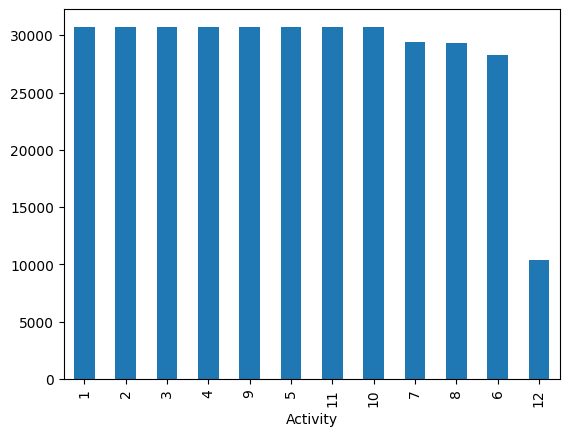

In [ ]:
y.value_counts().plot(kind='bar')